<a href="https://colab.research.google.com/github/toche7/StatPy/blob/main/SEM_with_Semopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEM with Semopy

เอกสารนี้จะอธิบายการใช้งาน Library Sempoy สำหรับงานทางด้านการวิเคราะห์ SEM และ Model อื่นที่เกี่ยวข้องเช่น Regression, CFA เป็นต้น

https://cr-c.medium.com/analysis-and-visualisation-of-sem-using-python-semopy-structural-equation-modeling-bd6c3f463e33

https://semopy.com/tutorial.html

https://stats.oarc.ucla.edu/r/seminars/rsem/


In [ ]:
!pip install semopy
import semopy as sem
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Univariate regression


In [ ]:
from semopy import Model
from semopy.examples import univariate_regression

desc = univariate_regression.get_model()
data = univariate_regression.get_data()
print(desc)
desc = "y ~  x "

y ~ x


In [ ]:
print(data)

           y         x
0  -4.745088  1.422056
1  -0.157631 -1.088728
2  -1.618658  0.556356
3  -3.757160  2.115376
4  -1.078432 -0.948421
..       ...       ...
95 -1.524276  1.046533
96 -0.009116 -0.561601
97 -1.988864  0.229442
98 -0.387208 -1.597644
99 -0.235465 -1.102361

[100 rows x 2 columns]


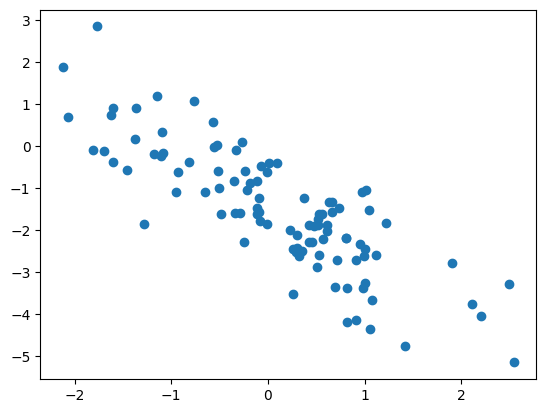

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x'],data['y'])

In [ ]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [ ]:
from semopy.means import estimate_means
print(estimate_means(mod))

  lval op rval  Estimate
0    x  ~    1  0.080315
1    y  ~    1 -1.421346


In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 11
Params: -1.221 0.670


In [ ]:
b0 = -1.421346
b1 = -1.221069
x = 1.422056
y =  b1*x + b0
y

-3.1577744978639997

In [ ]:
print(estimates)

  lval  op rval  Estimate  Std. Err    z-value       p-value
0    y   ~    x -1.221069  0.083165 -14.682538  0.000000e+00
1    y  ~~    y  0.670367  0.094804   7.071068  1.537437e-12


In [ ]:
v = np.var(data['y'])
np.sqrt(v)

1.4546282346294959

In [ ]:

testData = pd.DataFrame(data['x'])
print(testData)


           x
0   1.422056
1  -1.088728
2   0.556356
3   2.115376
4  -0.948421
..       ...
95  1.046533
96 -0.561601
97  0.229442
98 -1.597644
99 -1.102361

[100 rows x 1 columns]


In [ ]:
type(data.drop('y', axis = 1))

pandas.core.frame.DataFrame

In [ ]:
mod.predict(testData, intercepts= True)

,y,x
0,-3.157774,1.422056
1,-0.091935,-1.088728
2,-2.100695,0.556356
3,-4.004366,2.115376
4,-0.263259,-0.948421
...,...,...
95,-2.699235,1.046533
96,-0.735593,-0.561601
97,-1.701510,0.229442
98,0.529488,-1.597644


In [ ]:
mod.predict(data.drop('y', axis = 1), intercepts=)

,y,x
0,-1.736428,1.422056
1,1.329412,-1.088728
2,-0.679349,0.556356
3,-2.583020,2.115376
4,1.158087,-0.948421
...,...,...
95,-1.277889,1.046533
96,0.685754,-0.561601
97,-0.280164,0.229442
98,1.950834,-1.597644


# Univariate with multiple regression


In [ ]:
from semopy import Model
from semopy.examples import univariate_regression_many

desc = univariate_regression_many.get_model()
data = univariate_regression_many.get_data()
print(desc)

y ~ x1 + x2 + x3


In [ ]:
print(data)

           y        x1        x2        x3
0   4.466367  0.797753  0.326897  1.782983
1   1.572264  0.834132  0.455392  0.108099
2   3.763429 -0.174042 -0.168266  1.575743
3   5.756062  2.328577 -2.220830  1.189446
4  -0.557716  0.472969 -1.726820 -0.183997
..       ...       ...       ...       ...
95  2.791669  0.358544  0.403812  0.086191
96  0.149508 -0.035605 -0.649198 -0.211235
97 -2.496238 -1.161007 -1.605433 -1.484321
98 -0.456592 -0.260843  0.131655 -0.225028
99 -1.975335 -0.173606 -2.370115 -1.236709

[100 rows x 4 columns]


In [ ]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [ ]:
print(estimates)

  lval  op rval  Estimate  Std. Err    z-value       p-value
0    y   ~   x1  1.399551  0.091138  15.356385  0.000000e+00
1    y   ~   x2  0.450561  0.097883   4.603051  4.163465e-06
2    y   ~   x3  1.190470  0.086499  13.762839  0.000000e+00
3    y  ~~    y  0.878486  0.124237   7.071068  1.537437e-12


In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 13
Params: 1.400 0.451 1.190 0.878


In [ ]:
testData =  data.drop('y', axis= 1)
print(testData)

          x1        x2        x3
0   0.797753  0.326897  1.782983
1   0.834132  0.455392  0.108099
2  -0.174042 -0.168266  1.575743
3   2.328577 -2.220830  1.189446
4   0.472969 -1.726820 -0.183997
..       ...       ...       ...
95  0.358544  0.403812  0.086191
96 -0.035605 -0.649198 -0.211235
97 -1.161007 -1.605433 -1.484321
98 -0.260843  0.131655 -0.225028
99 -0.173606 -2.370115 -1.236709

[100 rows x 3 columns]


In [ ]:
mod.predict(testData)

,y,x1,x2,x3
0,3.386370,0.797753,0.326897,1.782983
1,1.501280,0.834132,0.455392,0.108099
2,1.556480,-0.174042,-0.168266,1.575743
3,3.674341,2.328577,-2.220830,1.189446
4,-0.335137,0.472969,-1.726820,-0.183997
...,...,...,...,...
95,0.786350,0.358544,0.403812,0.086191
96,-0.593803,-0.035605,-0.649198,-0.211235
97,-4.115273,-1.161007,-1.605433,-1.484321
98,-0.573634,-0.260843,0.131655,-0.225028


# Multivariate  Regression


In [ ]:
from semopy import Model
from semopy.examples import multivariate_regression

desc = multivariate_regression.get_model()
data = multivariate_regression.get_data()
print(desc)

y1, y2, y3 ~ x1 + x2 + x3


In [ ]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.068
Number of iterations: 17
Params: -1.390 -1.138 -0.318 -0.746 1.074 -1.131 0.703 1.235 -0.920 0.638 1.136 0.489


In [ ]:
print(estimates)

   lval  op rval  Estimate  Std. Err    z-value       p-value
0    y1   ~   x1 -1.389754  0.073417 -18.929470  0.000000e+00
1    y1   ~   x2 -1.138405  0.087966 -12.941462  0.000000e+00
2    y1   ~   x3 -0.317893  0.072576  -4.380132  1.186073e-05
3    y2   ~   x1 -0.745837  0.097974  -7.612623  2.686740e-14
4    y2   ~   x2  1.074436  0.117388   9.152855  0.000000e+00
5    y2   ~   x3 -1.130890  0.096851 -11.676597  0.000000e+00
6    y3   ~   x1  0.702778  0.064270  10.934755  0.000000e+00
7    y3   ~   x2  1.235044  0.077006  16.038334  0.000000e+00
8    y3   ~   x3 -0.920469  0.063534 -14.487925  0.000000e+00
9    y1  ~~   y1  0.637755  0.090192   7.071068  1.537437e-12
10   y2  ~~   y2  1.135729  0.160616   7.071068  1.537437e-12
11   y3  ~~   y3  0.488735  0.069118   7.071068  1.537437e-12


# CFA

In [ ]:
from semopy import Model
from semopy.examples import holzinger39

desc = holzinger39.get_model()
data = holzinger39.get_data()
print(desc)

visual =~ x1 + x2 + x3
textual =~ x4 + x5 + x6
speed =~ x7 + x8 + x9


In [ ]:
desc = ''' visual =~ x1 + x2 + x3
textual =~ x4 + x5 + x6
speed =~ x7 + x8 + x9
'''

In [ ]:
mod = Model(desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.283
Number of iterations: 28
Params: 0.554 0.731 1.113 0.926 1.180 1.083 0.371 1.133 0.566 0.550 0.356 0.800 0.446 0.488 0.844 0.980 0.408 0.174 0.808 0.262 0.383


In [ ]:
print(estimates)

       lval  op     rval  Estimate  Std. Err    z-value   p-value
0        x1   ~   visual  1.000000         -          -         -
1        x2   ~   visual  0.554421  0.099727   5.559413       0.0
2        x3   ~   visual  0.730526   0.10918   6.691009       0.0
3        x4   ~  textual  1.000000         -          -         -
4        x5   ~  textual  1.113076  0.065392  17.021522       0.0
5        x6   ~  textual  0.926120  0.055425  16.709493       0.0
6        x7   ~    speed  1.000000         -          -         -
7        x8   ~    speed  1.179980  0.165045   7.149459       0.0
8        x9   ~    speed  1.082517  0.151354   7.152197       0.0
9   textual  ~~  textual  0.980034  0.112145   8.739002       0.0
10  textual  ~~   visual  0.408277  0.073527    5.55273       0.0
11  textual  ~~    speed  0.173603  0.049316   3.520223  0.000431
12   visual  ~~   visual  0.808310  0.145287   5.563548       0.0
13   visual  ~~    speed  0.262135  0.056252   4.659977  0.000003
14    spee

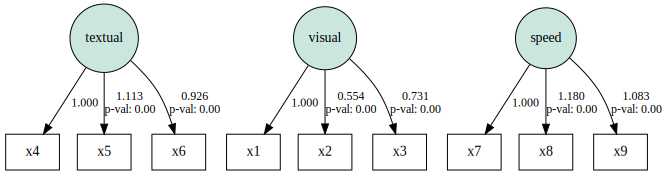

In [ ]:
sem.semplot(mod,'test.png')

# SEM
Political Democracy

In [ ]:
from semopy import Model
from semopy.examples import political_democracy

desc = political_democracy.get_model()
data = political_democracy.get_data()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [ ]:
mod = Model(desc)
fit_result = mod.fit(data)
inspect_result =mod.inspect()

In [ ]:
print(fit_result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 3.256 0.120 0.082 0.172 0.467 2.352 3.430 0.448


In [ ]:
print(inspect_result)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

In [ ]:
stats = sem.calc_stats(mod)
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


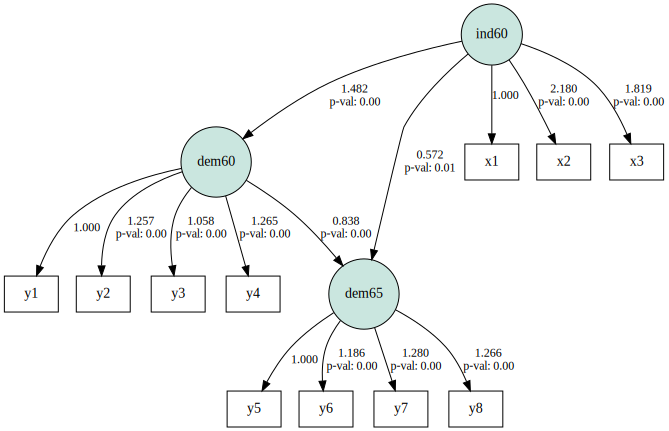

In [ ]:
sem.semplot(mod,'test1.png')